<a href="https://colab.research.google.com/github/A7Che/15012025/blob/main/%D0%9A%D0%BE%D0%BF%D0%B8%D1%8F_%D0%B1%D0%BB%D0%BE%D0%BA%D0%BD%D0%BE%D1%82%D0%B0_%22cv_lecture3_ipynb%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Saving компьютер.jpg to компьютер (12).jpg


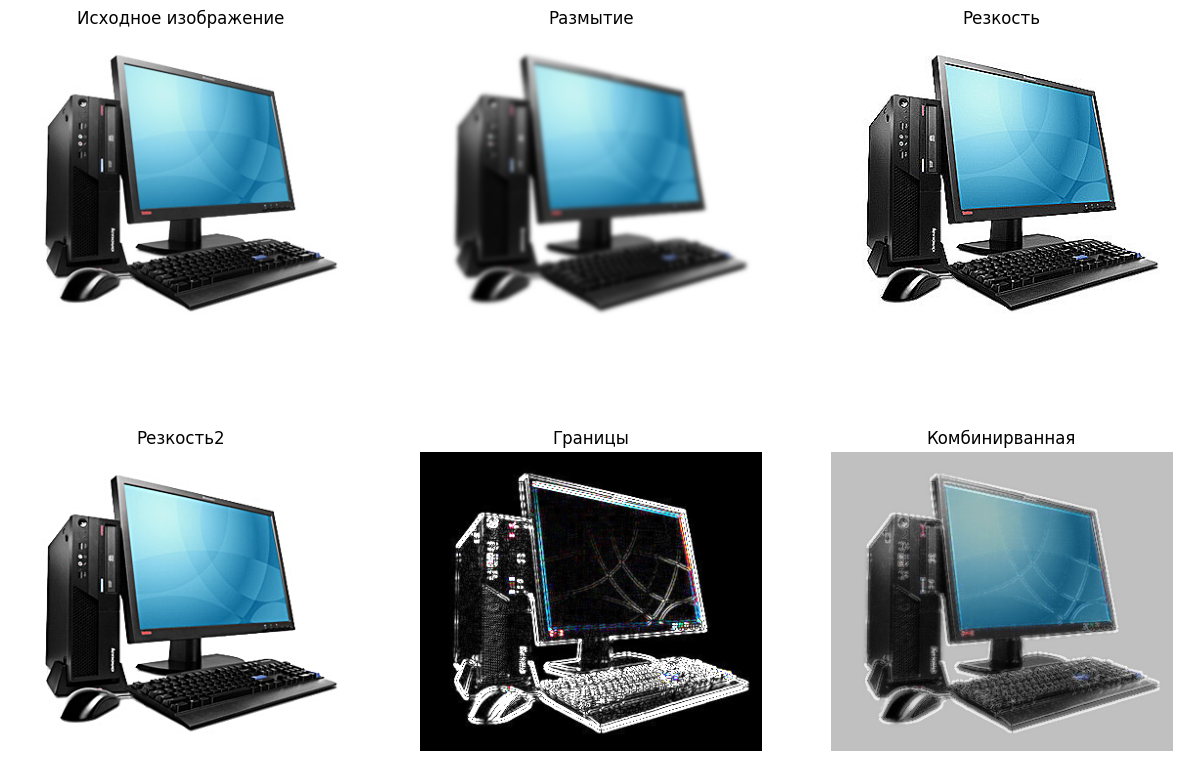

In [19]:
import cv2
import matplotlib.pyplot as plt
from google.colab import files
import numpy as np

# Функция для загрузки изображения
uploaded = files.upload()

# Получаем имя загруженного файла
image_path = next(iter(uploaded))

# Читаем загруженное изображение
image = cv2.imread(image_path)

# Преобразуем изображение из BGR (формат OpenCV) в RGB (формат для Matplotlib)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

blurred_image = cv2.GaussianBlur(image_rgb, (11, 11), 0)

kernel = np.array([[0, -1, 0],
                   [-1, 5, -1],
                   [0, -1, 0]])
sharpened = cv2.filter2D(image_rgb, -1, kernel)

sharpened_2 = cv2.addWeighted(image_rgb, 1.5, blurred_image, -0.5, 0)


edges = cv2.Sobel(image_rgb, cv2.CV_64F, 1, 1, ksize=5)
edges = cv2.convertScaleAbs(edges)

combined = cv2.addWeighted(edges, 0.5, sharpened, 0.5, 0)
combined = cv2.addWeighted(combined, 0.5, blurred_image, 0.5, 0)

# Функция отображения изображений
def show_images(titles, images):
    plt.figure(figsize=(15, 10))
    for i in range(len(images)):
        plt.subplot(2, 3 , i + 1)
        plt.imshow(images[i], cmap='gray')
        plt.title(titles[i])
        plt.axis('off')
    plt.show()



titles = ['Исходное изображение', 'Размытие', 'Резкость', 'Резкость2', 'Границы', 'Комбинирванная']
images = [image_rgb, blurred_image, sharpened, sharpened_2, edges, combined]

show_images(titles, images)

